# Car Price Prediction 
- Used https://www.kaggle.com/datasets/adityadesai13/used-car-dataset-ford-and-mercedes/data?select=vw.csv dataset
- Concat 9 different df's which contains different brand cars 

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os 
from lazypredict.Supervised import LazyRegressor

%matplotlib inline 

In [23]:
BASE_DIR = "/Users/user/Desktop/Projects/data-science/ml-hw/data/car_price_datasets"
FILES_DIR_LIST = os.listdir(BASE_DIR)

print(FILES_DIR_LIST)

['vauxhall.csv', 'bmw.csv', 'vw.csv', 'hyundi.csv', 'audi.csv', 'toyota.csv', 'ford.csv', 'skoda.csv', 'merc.csv']


In [24]:
import os
import pandas as pd

all_dfs = []

for file_name in FILES_DIR_LIST:
    file_dir = os.path.join(BASE_DIR, file_name)
    car_name = os.path.splitext(file_name)[0]
    df = pd.read_csv(file_dir)
    df["CAR_NAME"] = car_name
    all_dfs.append(df)

final_df = pd.concat(all_dfs, ignore_index=True)
print(final_df.head())
final_df.to_csv(os.path.join(BASE_DIR, "final_df.csv"))


    model  year  price transmission  mileage fuelType  tax   mpg  engineSize  \
0   Corsa  2018   7885       Manual     9876   Petrol  145 55.40        1.40   
1   Corsa  2019  11995       Manual     2500   Petrol  145 54.30        1.40   
2   Corsa  2017   9777    Automatic     9625   Petrol  145 47.90        1.40   
3   Corsa  2016   8500       Manual    25796   Petrol   30 55.40        1.40   
4   Corsa  2019  10000       Manual     3887   Petrol  145 43.50        1.40   

   CAR_NAME  
0  vauxhall  
1  vauxhall  
2  vauxhall  
3  vauxhall  
4  vauxhall  


In [25]:
for file_name in FILES_DIR_LIST:
    file_dir = os.path.join(BASE_DIR, file_name)
    df = pd.read_csv(file_dir)
    print(file_name)
    print(df.head())
    print(75 * "*")

vauxhall.csv
    model  year  price transmission  mileage fuelType  tax   mpg  engineSize
0   Corsa  2018   7885       Manual     9876   Petrol  145 55.40        1.40
1   Corsa  2019  11995       Manual     2500   Petrol  145 54.30        1.40
2   Corsa  2017   9777    Automatic     9625   Petrol  145 47.90        1.40
3   Corsa  2016   8500       Manual    25796   Petrol   30 55.40        1.40
4   Corsa  2019  10000       Manual     3887   Petrol  145 43.50        1.40
***************************************************************************
bmw.csv
       model  year  price transmission  mileage fuelType  tax   mpg  \
0   5 Series  2014  11200    Automatic    67068   Diesel  125 57.60   
1   6 Series  2018  27000    Automatic    14827   Petrol  145 42.80   
2   5 Series  2016  16000    Automatic    62794   Diesel  160 51.40   
3   1 Series  2017  12750    Automatic    26676   Diesel  145 72.40   
4   7 Series  2014  14500    Automatic    39554   Diesel  160 50.40   

   engineSize 

In [26]:
final_df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,CAR_NAME
0,Corsa,2018,7885,Manual,9876,Petrol,145,55.40,1.40,vauxhall
1,Corsa,2019,11995,Manual,2500,Petrol,145,54.30,1.40,vauxhall
2,Corsa,2017,9777,Automatic,9625,Petrol,145,47.90,1.40,vauxhall
3,Corsa,2016,8500,Manual,25796,Petrol,30,55.40,1.40,vauxhall
4,Corsa,2019,10000,Manual,3887,Petrol,145,43.50,1.40,vauxhall


# First Inspection
- analyze_df function to analyze each columns data types mean mode etc.
- grab_col_names function to seperate categorical and numerical columns 
- change data types etc if there is something wrong 

In [27]:
def analyze_df(df: pd.DataFrame):
    print(20 * "-", "Columns", 20 * "-")
    print(df.columns)
    print(20 * "-", "First 5 Data in the Dataframe", 20 * "-")
    print(df.head(5))
    print(20 * "-", "DF INFO", 20 * "-")
    print(df.info())
    print(20 * "-", "DF DESCRIBE", 20 * "-")
    print(df.describe())
    print(20 * "-", "NULL COUNt", 20 * "-")
    print(df.isna().sum())
    print(20 * "-", "DF SHAPE", 20 * "-")
    print(df.shape)
    print(20 * "-", "DF DUPLICATES", 20 * "-")
    print(df.duplicated().sum())
    print(20 * "-", "DF UNIQUE VALUES", 20 * "-")
    print(df.nunique())
    print(20 * "-", "DF VALUE COUNTS", 20 * "-")
    print(df.value_counts())
    print(20 * "-", "UNIQUE VALUES EACH COLUMN", 20 * "-")
    for col in df.columns:
        print(20 * "-", f"{col} UNIQUE VALUES", 20 * "-")
        print(df[col].unique())
         
def grab_col_names(df: pd.DataFrame, cat_th: int = 10, car_th: int = 20) -> tuple[list, list, list]:
    """
    Identifies and categorizes columns in a dataframe as categorical, numerical, or categorical but cardinal.
    
    Parameters:
    -----------
    df: pd.DataFrame
        The input dataframe
    cat_th: int, default=10
        Threshold for numerical columns to be considered categorical
    car_th: int, default=20
        Threshold for categorical columns to be considered cardinal
        
    Returns:
    --------
    tuple[list, list, list]:
        cat_cols: Categorical columns
        num_cols: Numerical columns
        categorical_but_car: Categorical but cardinal columns
    """
    # 1. Fix: Changed "0" to "O" for object dtype check
    categorical_cols = [col for col in df.columns if df[col].dtypes == "O"]
    
    # 2. Fix: Added proper dtype checks for numerical columns
    numerical_but_cat = [col for col in df.columns if df[col].nunique() < cat_th and 
                        df[col].dtypes in ['int64', 'float64']]
    
    # 3. Fix: Check categorical columns for cardinality
    categorical_but_car = [col for col in categorical_cols if df[col].nunique() > car_th]
    
    # Combine categorical columns
    cat_cols = categorical_cols + numerical_but_cat
    cat_cols = [col for col in cat_cols if col not in categorical_but_car]
    
    # 4. Fix: Simplified numerical column identification
    num_cols = [col for col in df.columns if 
                df[col].dtypes in ['int64', 'float64'] and 
                col not in numerical_but_cat]
    
    # Print summary
    print(f"Observations: {df.shape[0]}")
    print(f"Variables: {df.shape[1]}")    
    print(f"cat_cols: {len(cat_cols)}")    
    print(f"num_cols: {len(num_cols)}")    
    print(f"cat_but_car: {len(categorical_but_car)}")
    print(f"num_but_cat: {len(numerical_but_cat)}")
    
    print("\nCategorical Cols:", cat_cols)
    print("\nNumerical Cols:", num_cols)
    print("\nCategorical but cardinal Cols:", categorical_but_car)
    
    return cat_cols, num_cols, categorical_but_car

In [28]:
def barplot_maker(df: pd.DataFrame, cat_x: str, cat_y: str, title: str):
    if not cat_x in df.columns or not cat_y in df.columns:
        raise ValueError(f"Column {cat_x} or {cat_y} not found in dataframe")
    
    plt.figure(figsize=(12, 6))
    sns.barplot(x=cat_x, y=cat_y, data=df)
    plt.title(title, fontsize=14)
    plt.xlabel(cat_x, fontsize=12)
    plt.ylabel(cat_y, fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

def subplot_maker(df: pd.DataFrame, num_cols):
    plt.figure(figsize=(20, 25))
    for i in range(0, len(num_cols)):
        plt.subplot(5, 3, i+1)
        sns.kdeplot(x=df[num_cols[i]], color="b", fill=True)
        plt.xlabel(num_cols[i], fontsize=12)
        plt.ylabel('Density', fontsize=12)
        plt.title(num_cols[i], fontsize=14)
        plt.tight_layout()
    plt.show()


# EDA
## Jobs to be done 
2.1 Checking how many models are most populars:

2.2 Checking most popular year of the cars:

2.3 Checking the average price for each years model

2.4 Checking which transmission is more popular

2.5 Checking which fuel type is more popular

2.6 Investigation over the car price changes

2.7 Summary of the analyse

In [29]:
analyze_df(final_df)

-------------------- Columns --------------------
Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize', 'CAR_NAME'],
      dtype='object')
-------------------- First 5 Data in the Dataframe --------------------
    model  year  price transmission  mileage fuelType  tax   mpg  engineSize  \
0   Corsa  2018   7885       Manual     9876   Petrol  145 55.40        1.40   
1   Corsa  2019  11995       Manual     2500   Petrol  145 54.30        1.40   
2   Corsa  2017   9777    Automatic     9625   Petrol  145 47.90        1.40   
3   Corsa  2016   8500       Manual    25796   Petrol   30 55.40        1.40   
4   Corsa  2019  10000       Manual     3887   Petrol  145 43.50        1.40   

   CAR_NAME  
0  vauxhall  
1  vauxhall  
2  vauxhall  
3  vauxhall  
4  vauxhall  
-------------------- DF INFO --------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99187 entries, 0 to 99186
Data columns (total 10 columns):
 #   Column 

In [30]:
final_df[final_df["year"] == 2060]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,CAR_NAME
79562,Fiesta,2060,6495,Automatic,54807,Petrol,205,42.80,1.40,ford


In [31]:
# removing the row that contains wrong info 
print(final_df.shape)
final_df.drop(79562, inplace=True)
print(final_df.shape)

(99187, 10)
(99186, 10)


In [32]:
cat_cols, num_cols, cat_but_car_cols = grab_col_names(final_df)

Observations: 99186
Variables: 10
cat_cols: 3
num_cols: 6
cat_but_car: 1
num_but_cat: 0

Categorical Cols: ['transmission', 'fuelType', 'CAR_NAME']

Numerical Cols: ['year', 'price', 'mileage', 'tax', 'mpg', 'engineSize']

Categorical but cardinal Cols: ['model']


In [33]:
final_df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,CAR_NAME
0,Corsa,2018,7885,Manual,9876,Petrol,145,55.40,1.40,vauxhall
1,Corsa,2019,11995,Manual,2500,Petrol,145,54.30,1.40,vauxhall
2,Corsa,2017,9777,Automatic,9625,Petrol,145,47.90,1.40,vauxhall
3,Corsa,2016,8500,Manual,25796,Petrol,30,55.40,1.40,vauxhall
4,Corsa,2019,10000,Manual,3887,Petrol,145,43.50,1.40,vauxhall


In [34]:
# Model price averages 
grouped_by_model = final_df.groupby("model")
grouped_by_model[num_cols].mean().sort_values("price", ascending=False).reset_index()

,model,year,price,mileage,tax,mpg,engineSize
0,G Class,2016.93,98934.20,19093.73,284.00,23.00,3.87
1,R8,2016.86,97652.21,12363.00,296.07,22.41,4.99
2,X7,2019.25,69842.76,5271.07,145.73,31.84,3.00
3,8 Series,2019.28,63997.79,3832.90,145.90,33.53,3.25
4,Q8,2019.03,60115.01,6412.04,145.87,32.97,3.09
...,...,...,...,...,...,...,...
190,Streetka,2005.50,1924.50,68527.50,280.00,35.55,1.60
191,Amica,2007.00,1750.00,53000.00,160.00,46.30,1.10
192,Fox,2007.50,1733.50,78701.50,160.00,45.22,1.25
193,Vectra,2006.25,1608.75,106750.00,251.25,36.40,2.17


In [35]:
# brand price averages 
grouped_by_brand = final_df.groupby("CAR_NAME")
grouped_by_brand[num_cols].mean().sort_values("price", ascending=False).reset_index()

,CAR_NAME,year,price,mileage,tax,mpg,engineSize
0,merc,2017.30,24698.60,21949.56,129.97,55.16,2.07
1,audi,2017.10,22896.69,24827.24,126.01,50.77,1.93
2,bmw,2017.08,22733.41,25496.99,131.70,56.40,2.17
3,vw,2017.26,16838.95,22092.79,112.74,53.75,1.60
4,skoda,2017.50,14275.45,20118.45,117.41,56.59,1.43
5,hyundi,2017.11,12750.13,21486.05,121.15,53.83,1.46
6,toyota,2016.75,12522.39,22857.41,94.70,63.04,1.47
7,ford,2016.86,12280.08,23361.88,113.33,57.91,1.35
8,vauxhall,2016.96,10406.46,23499.30,128.77,51.54,1.42


In [36]:
final_df.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize', 'CAR_NAME'],
      dtype='object')

In [37]:
# group by year 
num_cols.remove("year")
grouped_by_year = final_df.groupby("year")
grouped_by_year[num_cols].mean().sort_values("mileage", ascending=False).reset_index()

,year,price,mileage,tax,mpg,engineSize
0,2004,4523.77,91267.35,270.48,35.39,2.22
1,2005,3017.42,90262.87,234.78,40.70,1.92
2,2008,3991.89,88978.43,215.72,43.83,1.86
3,2006,3714.09,88404.12,278.55,40.46,2.03
4,2007,3706.44,86650.66,254.33,40.97,1.89
5,2003,3658.03,86013.74,264.12,36.56,2.17
6,1997,4886.25,84058.25,263.75,29.55,2.73
7,2009,4365.72,81134.86,177.23,47.35,1.73
8,2002,3579.29,80611.23,289.84,33.66,2.31
9,2010,5286.15,79279.61,165.56,49.47,1.80


In [38]:
# count how many cars in different fuel type 
final_df["fuelType"].value_counts()

fuelType
Petrol      54927
Diesel      40928
Hybrid       3078
Other         247
Electric        6
Name: count, dtype: int64

In [39]:
final_df["transmission"].value_counts()

transmission
Manual       56445
Semi-Auto    22677
Automatic    20055
Other            9
Name: count, dtype: int64

In [40]:
grouped_years_and_model = final_df.groupby(["year", "model"])
grouped_years_and_model["price"].mean().reset_index().sort_values("price", ascending=False)

,year,model,price
1534,2020,G Class,157498.50
488,2011,SL CLASS,149948.00
1573,2020,R8,138965.00
1452,2019,R8,122742.92
1403,2019,G Class,121225.00
...,...,...,...
64,2003,Avensis,850.00
58,2003,A Class,650.00
68,2003,Corsa,590.00
62,2003,Agila,450.00


In [41]:
final_df["year"].value_counts()

year
2019    26771
2017    21733
2016    15850
2018    13664
2015     7645
2020     4465
2014     4085
2013     2603
2012      634
2011      432
2010      340
2009      278
2008      200
2007      163
2006       86
2005       69
2004       52
2003       34
2002       31
2001       20
2000        9
1998        8
1999        6
1997        4
1970        2
1996        2
Name: count, dtype: int64

# Encoding

In [42]:
final_df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,CAR_NAME
0,Corsa,2018,7885,Manual,9876,Petrol,145,55.40,1.40,vauxhall
1,Corsa,2019,11995,Manual,2500,Petrol,145,54.30,1.40,vauxhall
2,Corsa,2017,9777,Automatic,9625,Petrol,145,47.90,1.40,vauxhall
3,Corsa,2016,8500,Manual,25796,Petrol,30,55.40,1.40,vauxhall
4,Corsa,2019,10000,Manual,3887,Petrol,145,43.50,1.40,vauxhall


In [43]:
final_df["model"] = final_df["model"].str.strip()

for col in ["model", "transmission"]:
    print(final_df[col].unique())

['Corsa' 'Astra' 'Viva' 'Mokka' 'Mokka X' 'Crossland X' 'Zafira' 'Meriva'
 'Zafira Tourer' 'Adam' 'Grandland X' 'Antara' 'Insignia' 'Ampera' 'GTC'
 'Combo Life' 'Vivaro' 'Cascada' 'Kadjar' 'Agila' 'Tigra' 'Vectra'
 '5 Series' '6 Series' '1 Series' '7 Series' '2 Series' '4 Series' 'X3'
 '3 Series' 'X5' 'X4' 'i3' 'X1' 'M4' 'X2' 'X6' '8 Series' 'Z4' 'X7' 'M5'
 'i8' 'M2' 'M3' 'M6' 'Z3' 'T-Roc' 'Golf' 'Passat' 'T-Cross' 'Polo'
 'Tiguan' 'Sharan' 'Up' 'Scirocco' 'Beetle' 'Caddy Maxi Life' 'Caravelle'
 'Touareg' 'Arteon' 'Touran' 'Golf SV' 'Amarok' 'Tiguan Allspace'
 'Shuttle' 'Jetta' 'CC' 'California' 'Caddy Life' 'Caddy' 'Caddy Maxi'
 'Eos' 'Fox' 'I20' 'Tucson' 'I10' 'IX35' 'I30' 'I40' 'Ioniq' 'Kona'
 'Veloster' 'I800' 'IX20' 'Santa Fe' 'Accent' 'Terracan' 'Getz' 'Amica'
 'A1' 'A6' 'A4' 'A3' 'Q3' 'Q5' 'A5' 'S4' 'Q2' 'A7' 'TT' 'Q7' 'RS6' 'RS3'
 'A8' 'Q8' 'RS4' 'RS5' 'R8' 'SQ5' 'S8' 'SQ7' 'S3' 'S5' 'A2' 'RS7' 'GT86'
 'Corolla' 'RAV4' 'Yaris' 'Auris' 'Aygo' 'C-HR' 'Prius' 'Avensis' 'Verso'
 'H

In [44]:
agg_dict = {col: 'mean' for col in num_cols}
for col in final_df.select_dtypes(include='object').columns:
    if col not in ["CAR_NAME", "model"]:  # avoid aggregating groupby columns
        agg_dict[col] = lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan

grouped = final_df.groupby(["CAR_NAME", "model"]).agg(agg_dict).reset_index()
grouped = grouped.sort_values(['CAR_NAME', 'price'], ascending=[True, False]).reset_index(drop=True)
# For each CAR_NAME, sort models by average price descending, assign label starting from 1
model_label_dict = {}

for car_name, group in grouped.groupby("CAR_NAME"):
    # Sort models by average price descending
    sorted_models = group.sort_values("price", ascending=False)["model"].tolist()
    # Assign label starting from 1
    length = len(sorted_models)
    # Assign label starting from length and decrease by one for each model
    model_label_dict[car_name] = {model: length - idx for idx, model in enumerate(sorted_models)}

# Now map these labels to the original dataframe
def label_model(row):
    return model_label_dict[row["CAR_NAME"]].get(row["model"], 0)


final_df["model_label"] = final_df.apply(label_model, axis=1)

final_df[["CAR_NAME", "model", "model_label"]].head()

,CAR_NAME,model,model_label
0,vauxhall,Corsa,8
1,vauxhall,Corsa,8
2,vauxhall,Corsa,8
3,vauxhall,Corsa,8
4,vauxhall,Corsa,8


In [45]:
# Calculate average price per CAR_NAME
brand_avg_price = final_df.groupby("CAR_NAME")["price"].mean().sort_values(ascending=False)
# Assign labels: highest price gets highest label
brand_label_dict = {car_name: len(brand_avg_price) - idx for idx, car_name in enumerate(brand_avg_price.index)}

# Map labels to the dataframe
final_df["brand_label"] = final_df["CAR_NAME"].map(brand_label_dict)

final_df[["CAR_NAME", "brand_label"]].head()


,CAR_NAME,brand_label
0,vauxhall,1
1,vauxhall,1
2,vauxhall,1
3,vauxhall,1
4,vauxhall,1


In [46]:
final_df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,CAR_NAME,model_label,brand_label
0,Corsa,2018,7885,Manual,9876,Petrol,145,55.40,1.40,vauxhall,8,1
1,Corsa,2019,11995,Manual,2500,Petrol,145,54.30,1.40,vauxhall,8,1
2,Corsa,2017,9777,Automatic,9625,Petrol,145,47.90,1.40,vauxhall,8,1
3,Corsa,2016,8500,Manual,25796,Petrol,30,55.40,1.40,vauxhall,8,1
4,Corsa,2019,10000,Manual,3887,Petrol,145,43.50,1.40,vauxhall,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...
99182,C Class,2020,35999,Automatic,500,Diesel,145,55.40,2.00,merc,16,9
99183,B Class,2020,24699,Automatic,2500,Diesel,145,55.40,2.00,merc,8,9
99184,GLC Class,2019,30999,Automatic,11612,Diesel,145,41.50,2.10,merc,22,9
99185,CLS Class,2019,37990,Automatic,2426,Diesel,145,45.60,2.00,merc,18,9


In [47]:
grouped[grouped["CAR_NAME"] == "vw"]

,CAR_NAME,model,price,mileage,tax,mpg,engineSize,transmission,fuelType
168,vw,California,57593.87,7422.27,260.33,33.74,2.00,Automatic,Diesel
169,vw,Caravelle,39325.66,22458.66,182.67,34.19,2.01,Automatic,Diesel
170,vw,Touareg,32882.24,22863.19,183.18,37.71,3.00,Semi-Auto,Diesel
171,vw,Tiguan Allspace,28770.30,7828.60,146.15,40.37,1.92,Semi-Auto,Diesel
172,vw,Amarok,27991.50,21525.99,260.68,33.87,2.78,Automatic,Diesel
173,vw,Arteon,26285.02,7390.29,145.42,47.35,1.94,Semi-Auto,Diesel
174,vw,Shuttle,24388.15,17600.25,154.59,40.62,2.00,Manual,Diesel
175,vw,T-Roc,22839.39,7345.65,145.83,46.69,1.61,Manual,Petrol
176,vw,Sharan,22072.95,16352.51,146.92,44.90,1.92,Semi-Auto,Diesel
177,vw,Tiguan,21644.75,21226.32,150.70,47.07,1.91,Manual,Diesel


In [48]:
grouped[grouped["CAR_NAME"] == "audi"]

,CAR_NAME,model,price,mileage,tax,mpg,engineSize,transmission,fuelType
0,audi,R8,97652.21,12363.00,296.07,22.41,4.99,Automatic,Petrol
1,audi,Q8,60115.01,6412.04,145.87,32.97,3.09,Semi-Auto,Diesel
2,audi,RS6,55963.87,28524.64,285.90,28.57,4.00,Automatic,Petrol
3,audi,RS5,51265.21,11572.76,187.76,30.12,3.03,Automatic,Petrol
4,audi,RS4,50151.61,21743.81,251.29,29.01,3.24,Semi-Auto,Petrol
5,audi,SQ7,49269.00,27659.38,203.12,39.20,4.00,Automatic,Diesel
6,audi,Q7,44788.32,21672.76,172.58,38.70,3.21,Automatic,Diesel
7,audi,A8,34981.85,18256.87,173.14,43.95,3.09,Automatic,Diesel
8,audi,RS3,34050.52,25870.55,222.12,33.08,2.50,Semi-Auto,Petrol
9,audi,S8,33807.75,29441.00,333.75,29.62,4.00,Automatic,Petrol


In [49]:
final_df["fuelType"].unique()

array(['Petrol', 'Diesel', 'Other', 'Hybrid', 'Electric'], dtype=object)

In [50]:
final_df["transmission"].unique()

array(['Manual', 'Automatic', 'Semi-Auto', 'Other'], dtype=object)

Observations: 99186
Variables: 12
cat_cols: 4
num_cols: 7
cat_but_car: 1
num_but_cat: 1

Categorical Cols: ['transmission', 'fuelType', 'CAR_NAME', 'brand_label']

Numerical Cols: ['year', 'price', 'mileage', 'tax', 'mpg', 'engineSize', 'model_label']

Categorical but cardinal Cols: ['model']


<Axes: >

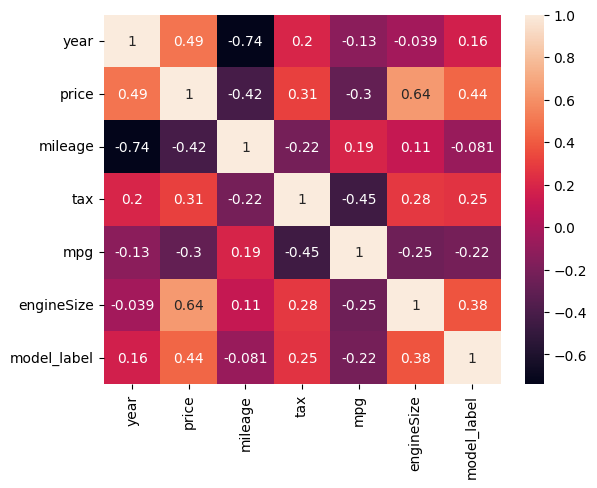

In [51]:
cat_cols, num_cols, cat_but_car_cols = grab_col_names(final_df)
sns.heatmap(final_df[num_cols].corr(), annot=True)

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from lazypredict.Supervised import LazyRegressor

In [53]:
def correlation_for_drop(df: pd.DataFrame, threshold: float = 0.85):
    columns_to_drop = set()
    correlations = df.corr()
    col_len = len(correlations.columns)
    
    for i in range(col_len):
        for j in range(i):
            if abs(correlations.iloc[i,j]) > threshold:
                columns_to_drop.add(correlations.columns[i])

    return columns_to_drop

cols = correlation_for_drop(final_df[num_cols])
cols

set()

In [54]:
final_df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,CAR_NAME,model_label,brand_label
0,Corsa,2018,7885,Manual,9876,Petrol,145,55.40,1.40,vauxhall,8,1
1,Corsa,2019,11995,Manual,2500,Petrol,145,54.30,1.40,vauxhall,8,1
2,Corsa,2017,9777,Automatic,9625,Petrol,145,47.90,1.40,vauxhall,8,1
3,Corsa,2016,8500,Manual,25796,Petrol,30,55.40,1.40,vauxhall,8,1
4,Corsa,2019,10000,Manual,3887,Petrol,145,43.50,1.40,vauxhall,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...
99182,C Class,2020,35999,Automatic,500,Diesel,145,55.40,2.00,merc,16,9
99183,B Class,2020,24699,Automatic,2500,Diesel,145,55.40,2.00,merc,8,9
99184,GLC Class,2019,30999,Automatic,11612,Diesel,145,41.50,2.10,merc,22,9
99185,CLS Class,2019,37990,Automatic,2426,Diesel,145,45.60,2.00,merc,18,9


In [55]:
one_hot_transmission = pd.get_dummies(final_df["transmission"])
one_hot_fuel_type = pd.get_dummies(final_df["fuelType"])

df1 = pd.concat([final_df, one_hot_fuel_type, one_hot_transmission], axis=1)
df1.drop(["transmission", "fuelType"], axis=1, inplace=True)
df1

,model,year,price,mileage,tax,mpg,engineSize,CAR_NAME,model_label,brand_label,Diesel,Electric,Hybrid,Other,Petrol,Automatic,Manual,Other,Semi-Auto
0,Corsa,2018,7885,9876,145,55.40,1.40,vauxhall,8,1,False,False,False,False,True,False,True,False,False
1,Corsa,2019,11995,2500,145,54.30,1.40,vauxhall,8,1,False,False,False,False,True,False,True,False,False
2,Corsa,2017,9777,9625,145,47.90,1.40,vauxhall,8,1,False,False,False,False,True,True,False,False,False
3,Corsa,2016,8500,25796,30,55.40,1.40,vauxhall,8,1,False,False,False,False,True,False,True,False,False
4,Corsa,2019,10000,3887,145,43.50,1.40,vauxhall,8,1,False,False,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99182,C Class,2020,35999,500,145,55.40,2.00,merc,16,9,True,False,False,False,False,True,False,False,False
99183,B Class,2020,24699,2500,145,55.40,2.00,merc,8,9,True,False,False,False,False,True,False,False,False
99184,GLC Class,2019,30999,11612,145,41.50,2.10,merc,22,9,True,False,False,False,False,True,False,False,False
99185,CLS Class,2019,37990,2426,145,45.60,2.00,merc,18,9,True,False,False,False,False,True,False,False,False


In [56]:
df1.drop("model", axis=1, inplace=True)

In [57]:
df1.drop("CAR_NAME", axis=1, inplace=True)

In [58]:
df1

,year,price,mileage,tax,mpg,engineSize,model_label,brand_label,Diesel,Electric,Hybrid,Other,Petrol,Automatic,Manual,Other,Semi-Auto
0,2018,7885,9876,145,55.40,1.40,8,1,False,False,False,False,True,False,True,False,False
1,2019,11995,2500,145,54.30,1.40,8,1,False,False,False,False,True,False,True,False,False
2,2017,9777,9625,145,47.90,1.40,8,1,False,False,False,False,True,True,False,False,False
3,2016,8500,25796,30,55.40,1.40,8,1,False,False,False,False,True,False,True,False,False
4,2019,10000,3887,145,43.50,1.40,8,1,False,False,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99182,2020,35999,500,145,55.40,2.00,16,9,True,False,False,False,False,True,False,False,False
99183,2020,24699,2500,145,55.40,2.00,8,9,True,False,False,False,False,True,False,False,False
99184,2019,30999,11612,145,41.50,2.10,22,9,True,False,False,False,False,True,False,False,False
99185,2019,37990,2426,145,45.60,2.00,18,9,True,False,False,False,False,True,False,False,False


In [59]:
df1 = df1.replace({True: 1, False: 0})

In [60]:
df1

,year,price,mileage,tax,mpg,engineSize,model_label,brand_label,Diesel,Electric,Hybrid,Other,Petrol,Automatic,Manual,Other,Semi-Auto
0,2018,7885,9876,145,55.40,1.40,8,1,0,0,0,0,1,0,1,0,0
1,2019,11995,2500,145,54.30,1.40,8,1,0,0,0,0,1,0,1,0,0
2,2017,9777,9625,145,47.90,1.40,8,1,0,0,0,0,1,1,0,0,0
3,2016,8500,25796,30,55.40,1.40,8,1,0,0,0,0,1,0,1,0,0
4,2019,10000,3887,145,43.50,1.40,8,1,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99182,2020,35999,500,145,55.40,2.00,16,9,1,0,0,0,0,1,0,0,0
99183,2020,24699,2500,145,55.40,2.00,8,9,1,0,0,0,0,1,0,0,0
99184,2019,30999,11612,145,41.50,2.10,22,9,1,0,0,0,0,1,0,0,0
99185,2019,37990,2426,145,45.60,2.00,18,9,1,0,0,0,0,1,0,0,0


In [61]:
df1.columns

Index(['year', 'price', 'mileage', 'tax', 'mpg', 'engineSize', 'model_label',
       'brand_label', 'Diesel', 'Electric', 'Hybrid', 'Other', 'Petrol',
       'Automatic', 'Manual', 'Other', 'Semi-Auto'],
      dtype='object')

# Scaling 

In [62]:
X = df1.drop("price", axis=1)
y = df1["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()


In [63]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Building and Predictions


In [64]:
reg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)
models, preds = reg.fit(X_train_scaled[:100], X_test_scaled[:100], y_train[:100], y_test[:100])
models

  0%|          | 0/42 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000282 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 131
[LightGBM] [Info] Number of data points in the train set: 100, number of used features: 11
[LightGBM] [Info] Start training from score 16979.710000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
PoissonRegressor,0.82,0.85,2657.01,0.01
ExtraTreesRegressor,0.76,0.80,3031.86,0.07
PassiveAggressiveRegressor,0.74,0.78,3213.26,0.01
LassoCV,0.73,0.78,3225.48,0.04
GammaRegressor,0.73,0.78,3226.54,0.09
LassoLarsCV,0.73,0.78,3227.42,0.02
LarsCV,0.73,0.78,3227.42,0.01
HuberRegressor,0.73,0.78,3232.73,0.01
Lasso,0.72,0.76,3312.80,0.01


In [65]:
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, ElasticNetCV

lasso_model = Lasso()
lasso_model_cv = LassoCV(cv=16)

ridge_model = Ridge()
ridge_model_cv = RidgeCV(cv=16)

en_model = ElasticNet()
en_model_cv = ElasticNetCV(cv=16)


In [66]:
lasso_model.fit(X_train_scaled, y_train)
lasso_model_cv.fit(X_train_scaled, y_train)

ridge_model.fit(X_train_scaled, y_train)
ridge_model_cv.fit(X_train_scaled, y_train)

en_model.fit(X_train_scaled, y_train)
en_model_cv.fit(X_train_scaled, y_train)

ElasticNetCV(cv=16)

In [67]:
def eval_model(model):
    y_pred = model.predict(X_test_scaled)

    score = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    print("R2: ", score, "MSE: ", mse, "MAE: ", mae)

In [71]:
models = [lasso_model, lasso_model_cv, ridge_model, ridge_model_cv, en_model, en_model_cv]
model_names = ["Lasso", "LassoCV", "Ridge", "RidgeCV", "ElasticNet", "ElasticNetCV"]

for idx, model in enumerate(models):
    print(40 * "*", model_names[idx], 40 * "*")
    eval_model(model)
    print()

**************************************** Lasso ****************************************
R2:  0.783324831095917 MSE:  21149839.131366745 MAE:  2956.8652643977416

**************************************** LassoCV ****************************************
R2:  0.78334279361296 MSE:  21148085.79549639 MAE:  2954.8182751885643

**************************************** Ridge ****************************************
R2:  0.7833199843271189 MSE:  21150312.22840368 MAE:  2957.2484628605853

**************************************** RidgeCV ****************************************
R2:  0.7833182063778049 MSE:  21150485.775479544 MAE:  2957.126337929538

**************************************** ElasticNet ****************************************
R2:  0.737017641090921 MSE:  25669921.539447624 MAE:  3023.184873872554

**************************************** ElasticNetCV ****************************************
R2:  0.37709467028178323 MSE:  60802294.901836306 MAE:  5248.530437271794

